# DIXEFT parameterization of  nucleon electromagnetic form factors

### Authors
J. M. Alarcón (josalarc@ucm.es),
D. W. Higinbotham (doug@jlab.org),
C. Weiss (weiss@jlab.org)

### Version
V3. Last modified 10-Feb-2020

### Distribution
Included in Supplementary Materials to article "Precise determination of proton magnetic radius from electron scattering data" by Alarcón, Higinbotham, Weiss

### Description
<a id='section_description'></a>

DIXEFT is a theoretical framework for describing nucleon form factors combining methods of chiral effective field theory and dispersion analysis [[1-4]](#section_references). It implements analyticity in the momentum transfer and the dynamics governing the shape of the form factors at low $Q^2$ ~< 1 GeV$^2$. Dispersion relations allow one to express the model parameters in terms of the derivatives of the form factors at $Q^2 = 0$ (nucleon radii), so that the radii
can be used as the basic model parameters. In this way one obtains a parametrization of the form factors that explicitly depends on the nucleon radii as parameters but incorporates the full dynamics of the theory and is valid up to $Q^2$ ~< 1 GeV$^2$ [[1]](#section_references). The parametrization can be used to predict the $Q^2$-dependence of the form factor for given arbitrary values of the radii, or to extract the physical values of the radii by performing fits to data.

This Jupyter notebook provides a code for evaluating the DIXEFT parameterization of the proton and neutron electric and magnetic form factors, $G_E^p, G_E^n, G_M^p, G_M^n$, at spacelike momentum transfers 0 < $Q^2$ ~< 1 GeV$^2$, for arbitrary values of the nucleon squared radii, $(r^2)_E^p, (r^2)_E^n, (r^2)_M^p, (r^2)_M^n$.
The examples show how the form factor parametrization is evaluated, plotted, and compared to other form factor parametrizations and data.

The DIXEFT parameterization represents the nucleon form factors as linear combinations of functions describing the contributions proportional to the various nucleon radii:
\begin{align}
G_E^p (Q^2) &= A_E^p(Q^2) + (r^2)_E^p B_E (Q^2)   + (r^2)_E^n \bar{B}_E (Q^2)
\\
G_E^n (Q^2) &= A_E^n(Q^2) + (r^2)_E^n B_E (Q^2)   + (r^2)_E^p \bar{B}_E (Q^2)
\\
G_M^p (Q^2) &= A_M^p(Q^2) + (r^2)_M^p B_M^p (Q^2) + (r^2)_M^n \bar{B}_M^p (Q^2)
\\
G_M^n (Q^2) &= A_M^n(Q^2) + (r^2)_M^n B_M^n(Q^2)  + (r^2)_M^p \bar{B}_M^n (Q^2)
\end{align}
<br>
(these forms are exact representations of the results of the DIXEFT dispersion integrals).
The functions $A_E^p(Q^2)... \bar{B}_M^n(Q^2)$ have been computed and are tabulated in the data file [DIXEFT-Parameterization.dat](DIXEFT-Parameterization.dat). The code reads the tabulated values, computes an interpolating spline, and combines the functions with the appropriate powers of the nucleon radii provided by the user.

The code provided here is intended for fast numerical evaluation of the form factor parametrization at non-exceptional momentum transfers 0 < $Q^2$ ~< 1 GeV$^2$ and has a numerical accuracy ~>$10^{-5}$ 
(for the physical uncertainty of the DIXEFT calculation, see Refs.[[1,2]](#section_references)). The code cannot be used for calculating
higher derivatives of the form factors at $Q^2$ = 0 (higher moments) by numerical differentiation. The DIXEFT framework can predict the higher moments of the form factors, but their numerical evaluation has to be done with the original dispersion integrals [[3]](#section_references). Users interested in evaluating the higher moments should contact the authors.

## A) Form factor parameterization
In this section we define the DIXEFT nucleon form factor parameterization (see [Description](#section_description)) and prepare some plots showing the dependence of the form factors on $Q^2$ for different values of the radius parameters.

### Read tabulated functions and compute interpolating spline

In [1]:
import numpy as np
from scipy.interpolate import interp1d

#Read data file into array
#Transpose array to allow for standard indexing
paramT = np.loadtxt('DIXEFT-Parameterization.dat')
param  = paramT.transpose()

#Compute interpolating spline
AEp    = interp1d(param[0], param[1],  kind='cubic')
AEn    = interp1d(param[0], param[2],  kind='cubic')
BE     = interp1d(param[0], param[3],  kind='cubic')
BbarE  = interp1d(param[0], param[4],  kind='cubic')
AMp    = interp1d(param[0], param[5],  kind='cubic')
BMp    = interp1d(param[0], param[6],  kind='cubic')
BbarMp = interp1d(param[0], param[7],  kind='cubic')
AMn    = interp1d(param[0], param[8],  kind='cubic')
BbarMn = interp1d(param[0], param[9],  kind='cubic')
BMn    = interp1d(param[0], param[10], kind='cubic')

### Define form factor parameterization

In [2]:
# Proton Electric Form Factor
def GEp(Q2,r2Ep,r2En):
    return AEp(Q2) + r2Ep*BE(Q2)  + r2En*BbarE(Q2)

# Neutron Magnetic Form Factors
def GEn(Q2,r2En,r2Ep):
    return AEn(Q2) + r2En*BE(Q2)  + r2Ep*BbarE(Q2)

# Proton Magnetic Form Factors
def GMp(Q2,r2Mp,r2Mn):
    return AMp(Q2) + r2Mp*BMp(Q2) + r2Mn*BbarMp(Q2)

# Neutron Magnetic Form Factors
def GMn(Q2,r2Mn,r2Mp):
    return AMn(Q2) + r2Mn*BMn(Q2) + r2Mp*BbarMn(Q2)

### Provide default values of electric and magnetic squared radii
The proton electric and magnetic radii are the ones determined in our analysis of electron-proton elastic scattering data. The neutron electric and magnetic radii are the PDG values.

In [3]:
#Set default values of squared radii. All values in fm^2 units
r2Ep =  0.842**2 #proton electric squared radius
r2Mp =  0.850**2 #proton magnetic squared radius
r2En = -0.112    #neutron electric squared radius 
r2Mn =  0.810**2 #neutron magentic squared radius

### Plot form factors

The following plots show the form factor parameterization as functions of $Q^2$ for several values of the radius parameters. They illustrate the $Q^2$ dependence of the functions and the sensitivity of the finite-$Q^2$ behavior to the radius parameters.

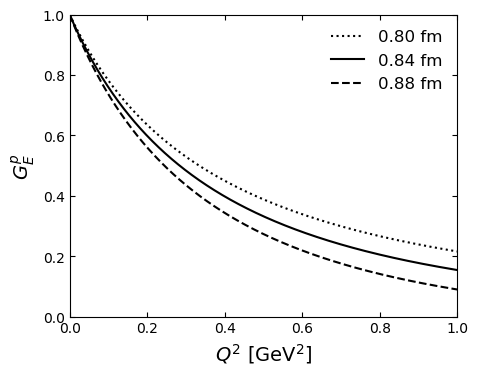

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot proton electric form factor for various values of the proton electric radius
# The neutron electric radius is kept at its default value defined above
Q2list=np.linspace(0,1,1000)
plt.figure(dpi=100,figsize=[5,4])
plt.plot(Q2list, GEp(Q2list,0.80**2,r2En), ':',  label='0.80 fm', color='black')
plt.plot(Q2list, GEp(Q2list,0.84**2,r2En), '-',  label='0.84 fm', color='black')
plt.plot(Q2list, GEp(Q2list,0.88**2,r2En), '--', label='0.88 fm', color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.tick_params(axis='y', which='both', tick2On=True, tickdir='in')
plt.tick_params(axis='x', which='both', tick2On=True, tickdir='in')
plt.xlabel('$Q^2$ [GeV$^2$]', fontsize=14)
plt.ylabel('$G_E^p$', fontsize=14)
plt.legend(frameon=False, fontsize=12, loc=1)
plt.show()

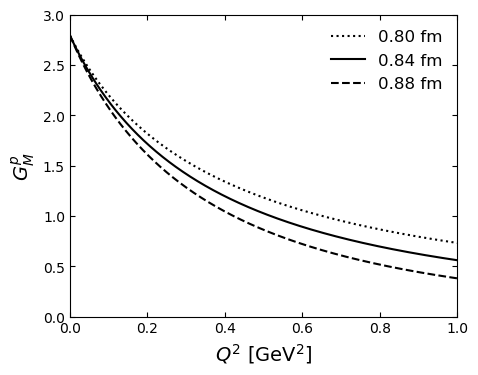

In [5]:
# Plot proton magnetic form factor for various values of the proton magnetic radius
# The neutron magnetic radius is kept at its default value defined above
Q2list=np.linspace(0,1,1000)
plt.figure(dpi=100,figsize=[5,4])
plt.plot(Q2list, GMp(Q2list,0.80**2,r2Mn), ':',  label='0.80 fm', color='black')
plt.plot(Q2list, GMp(Q2list,0.84**2,r2Mn), '-',  label='0.84 fm', color='black')
plt.plot(Q2list, GMp(Q2list,0.88**2,r2Mn), '--', label='0.88 fm', color='black')
plt.xlim(0,1)
plt.ylim(0,3)
plt.tick_params(axis='y', which='both', tick2On=True, tickdir='in')
plt.tick_params(axis='x', which='both', tick2On=True, tickdir='in')
plt.xlabel('$Q^2$ [GeV$^2$]', fontsize=14)
plt.ylabel('$G_M^p$', fontsize=14)
plt.legend(frameon=False, fontsize=12, loc=1)
plt.show()

## B) Comparison to Mainz results

In this section we compare the DIXEFT form factor predictions at the "physical" proton radii (as determined by our fit to the Mainz electron-proton cross section data) with an empirical form factor parameterization obtained from the Mainz data (spline fit; see Supplementary Materials of Ref. [5]). The plots show the excellent agreement of the DIXEFT parameterization with the empirical fit over the entire $Q^2$ range $\sim < 1$ GeV$^2$ covered by the Mainz data.

Ref.[[5]](#section_references) extracted values of the proton electric and magnetic radii by extrapolating their spline-based parameterization to $Q^2 = 0$ and obtained $r_E^p = 0.88$ fm and $r_M^p = 0.79$ fm. These values differ singnificantly from those extracted in our analysis using the DIXEFT parameterization, $r_E^p = 0.84$ fm and $r_M^p = 0.85$ fm. The fact that the fits to the $Q^2 > 0$ data obtained in both cases are in perfect agreement shows that the discrepancy in the extracted radii is due to the parameterization and extraction method used (extrapolating the spline fit to $Q^2 = 0$ vs. fitting the DIXEFT parameterization to the finite-$Q^2$ data). Theoretical arguments why the extrapolation of empirical fits is unstable, and how this problem is avoided in the DIXEFT approach, are presented in Ref.[[1]](#section_references) and the article to which this Notebook is attached.

For reference, the plots also show the DIXEFT form factor prediction when evaluated with the radii extracted in Ref.[[5]](#section_references) (which differ from those obtained in the DIXEFT fit). The difference illustrates the "discriminating power" of the finite-$Q^2$ form factor data in the DIXEFT analysis. The principal advantage of this approach is that it recruits the data up to $Q^2 \sim 0.5$ GeV$^2$ for the radius extraction and avoids the extrapolation to $Q^2 = 0$ [[1]](#section_references). 

### Compare form factor parameterizations directly

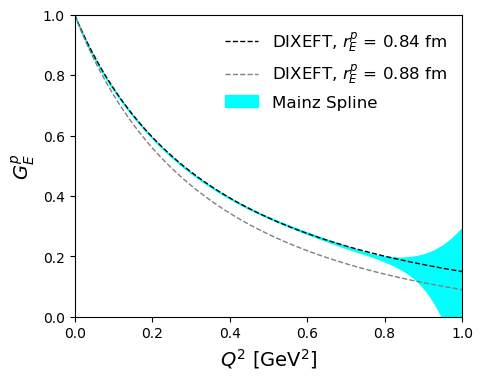

In [6]:
# Load Mainz spline fit
DataMainz = np.loadtxt('Spline.dat')

# Plot proton electric form factor
plt.figure(dpi=100, figsize=[5,4])
plt.plot(Q2list, GEp(Q2list, 0.843**2, r2En),'--',
         label='DIXEFT, $r_E^p$ = 0.84 fm',color='black',lw=1)
plt.plot(Q2list, GEp(Q2list, 0.88**2, r2En),'--',
         label='DIXEFT, $r_E^p$ = 0.88 fm',color='grey',lw=1)
plt.fill_between(DataMainz[:,0],DataMainz[:,1]+DataMainz[:,2],DataMainz[:,1]-DataMainz[:,2],
                 color='cyan',label='Mainz Spline')
plt.legend(frameon=False,fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('$Q^2$ [GeV$^2$]',fontsize=14)
plt.ylabel('$G_E^p$',fontsize=14)
plt.show()

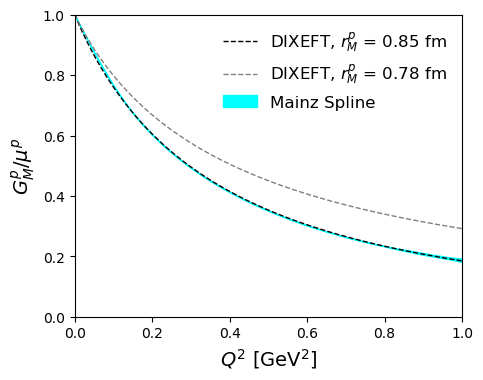

In [7]:
#Proton magnetic moment
mup = 2.791

# Plot normalized proton magnetic form factor (divided by magnetic moment)
plt.figure(dpi=100, figsize=[5,4])
plt.plot(Q2list, GMp(Q2list,0.85**2,r2Mn)/mup,'--',
         label='DIXEFT, $r_M^p$ = 0.85 fm',color='black',lw=1)
plt.plot(Q2list,GMp(Q2list,0.78**2,r2Mn)/mup,'--',
         label='DIXEFT, $r_M^p$ = 0.78 fm',color='grey',lw=1)
plt.fill_between(DataMainz[:,0],DataMainz[:,7]+DataMainz[:,8],DataMainz[:,7]-DataMainz[:,8],
                 color='cyan',label='Mainz Spline')
plt.legend(frameon=False,fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('$Q^2$ [GeV$^2$]',fontsize=14)
plt.ylabel('$G_M^p/\mu^p$',fontsize=14)
plt.show()

### Compare form factors divided by standard dipole

The following two plots compare the form factor parameterizations divided by the standard dipole. In the DIXEFT parameterization we also show the uncertainty resulting from the uncertainty of the radius parameters.

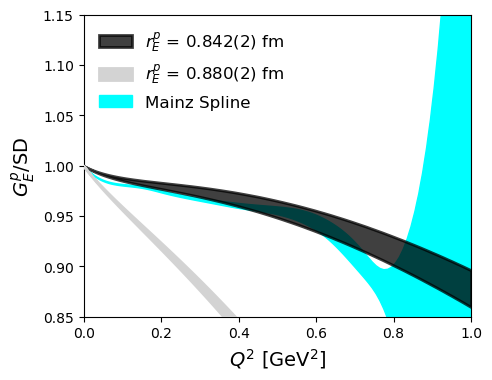

In [8]:
# Standard dipole form factor
def dip(Q2):
    return (1 + Q2/0.71)**(-2)

# Plot proton electric form factor divided by standard dipole,
# for electric radius in range r_E^p = 0.842 +/- 0.002 fm and 0.880 +/- 0.002 fm
plt.figure(dpi=100, figsize=[5,4])
plt.fill_between(Q2list, GEp(Q2list, 0.844**2, r2En)/dip(Q2list), GEp(Q2list, 0.840**2, r2En)/dip(Q2list),
         label='$r_E^p$ = 0.842(2) fm', color='black',lw=2, zorder=11, alpha=0.75)
plt.fill_between(Q2list, GEp(Q2list, 0.882**2, r2En)/dip(Q2list), GEp(Q2list, 0.878**2, r2En)/dip(Q2list),
         label='$r_E^p$ = 0.880(2) fm', color='lightgrey', lw=2, zorder=111)
plt.fill_between(DataMainz[:,0],
                 (DataMainz[:,1]+DataMainz[:,2])/dip(DataMainz[:,0]),
                 (DataMainz[:,1]-DataMainz[:,2])/dip(DataMainz[:,0]),
                 color='cyan',label='Mainz Spline')
plt.legend(frameon=False,fontsize=12,loc=2)
plt.xlim(0,1)
plt.ylim(.85,1.15)
plt.xlabel('$Q^2$ [GeV$^2$]',fontsize=14)
plt.ylabel('$G_E^p$/SD',fontsize=14)
plt.show()

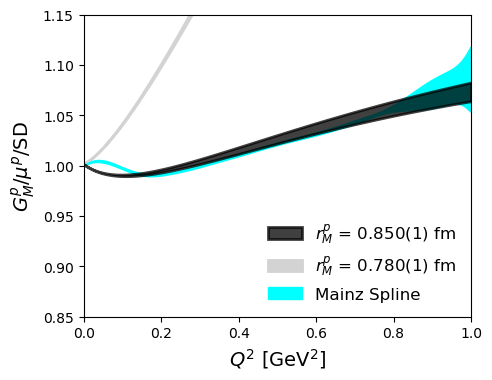

In [9]:
# Plot normalized proton magnetic form factor (divided by magnetic moment),
# divided by standard dipole, for magnetic radius in range
# r_M^p = 0.85 +/- 0.001 and 0.780 +/- 0.001
plt.figure(dpi=100,figsize=[5,4])
plt.fill_between(Q2list,GMp(Q2list,0.849**2,r2Mn)/mup/dip(Q2list),
        GMp(Q2list,0.851**2,r2Mn)/mup/dip(Q2list),
         label='$r_M^p$ = 0.850(1) fm',color='black',lw=2,alpha=0.75,zorder=111)
plt.fill_between(Q2list,GMp(Q2list,0.781**2,r2Mn)/2.79/dip(Q2list),
        GMp(Q2list,0.779**2,r2Mn)/mup/dip(Q2list),
         label='$r_M^p$ = 0.780(1) fm',color='lightgrey',lw=2)
plt.fill_between(DataMainz[:,0],
                 (DataMainz[:,7]+DataMainz[:,8])/dip(DataMainz[:,0]),
                 (DataMainz[:,7]-DataMainz[:,8])/dip(DataMainz[:,0]),
                 color='cyan',label='Mainz Spline')
plt.legend(frameon=False,fontsize=12,loc=4)
plt.xlim(0,1)
plt.ylim(0.85,1.15)
plt.xlabel('$Q^2$ [GeV$^2$]',fontsize=14)
plt.ylabel('$G_M^p/\mu^p$/SD',fontsize=14)
plt.show()

### References
<a id='section_references'></a>
[1] [J. M. Alarcón, D. W. Higinbotham, C. Weiss, and Zhihong Ye, Phys. Rev. C 99 (2019) 044303.](https://doi.org/10.1103/PhysRevC.99.044303)[[inspire](https://inspirehep.net/record/1694463)]<br>
[2] [J. M. Alarcón and C. Weiss, Phys. Lett. B 784 (2018) 373.](https://doi.org/10.1016/j.physletb.2018.07.060)[[inspire](http://inspirehep.net/record/1664308)]<br>
[3] [J. M. Alarcón and C. Weiss, Phys. Rev. C 97 (2018) 055203.](https://doi.org/10.1103/PhysRevC.97.055203)[[inspire](http://inspirehep.net/record/1631336)]<br>
[4] [J. M. Alarcón and C. Weiss, Phys. Rev. C 96 (2017) 055206.](https://doi.org/10.1103/PhysRevC.96.055206)[[inspire](http://inspirehep.net/record/1611580)]<br>
[5] [J. C. Bernauer et al., Phys. Rev. C 90 (2014) 015206.](https://doi.org/10.1103/PhysRevC.90.015206)[[inspire](https://inspirehep.net/record/1694463)]<br>